## <center> Packages <center>

In [1]:
from tests_impl import *
from tqdm.auto import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import non_partial_monte_carlo
import partial_monte_carlo
import torch
import numpy as np

# import warnings
# warnings.filterwarnings("ignore")

## <center> 1.1. Relevance Test [Done] <center>

In [18]:
# see test_impl: unconditional_relevance

## <center> 1.2 Simulation and sanity check [Done] <center>

In [21]:
sets_of_f2_indices = [
    [0],
    [1],
    [2],
    [3],
    [4],
    [0, 1, 4],
    [2, 3],
]

unconditional_results = non_partial_monte_carlo.monte_carlo_unconditional_relevance_prodecure(
    T=200,
    beta=0.98, 
    gamma=1.5,
    sets_of_f2_indices=sets_of_f2_indices,
    B=1000,
    num_alphas=5000,
    n_jobs=-1,
)

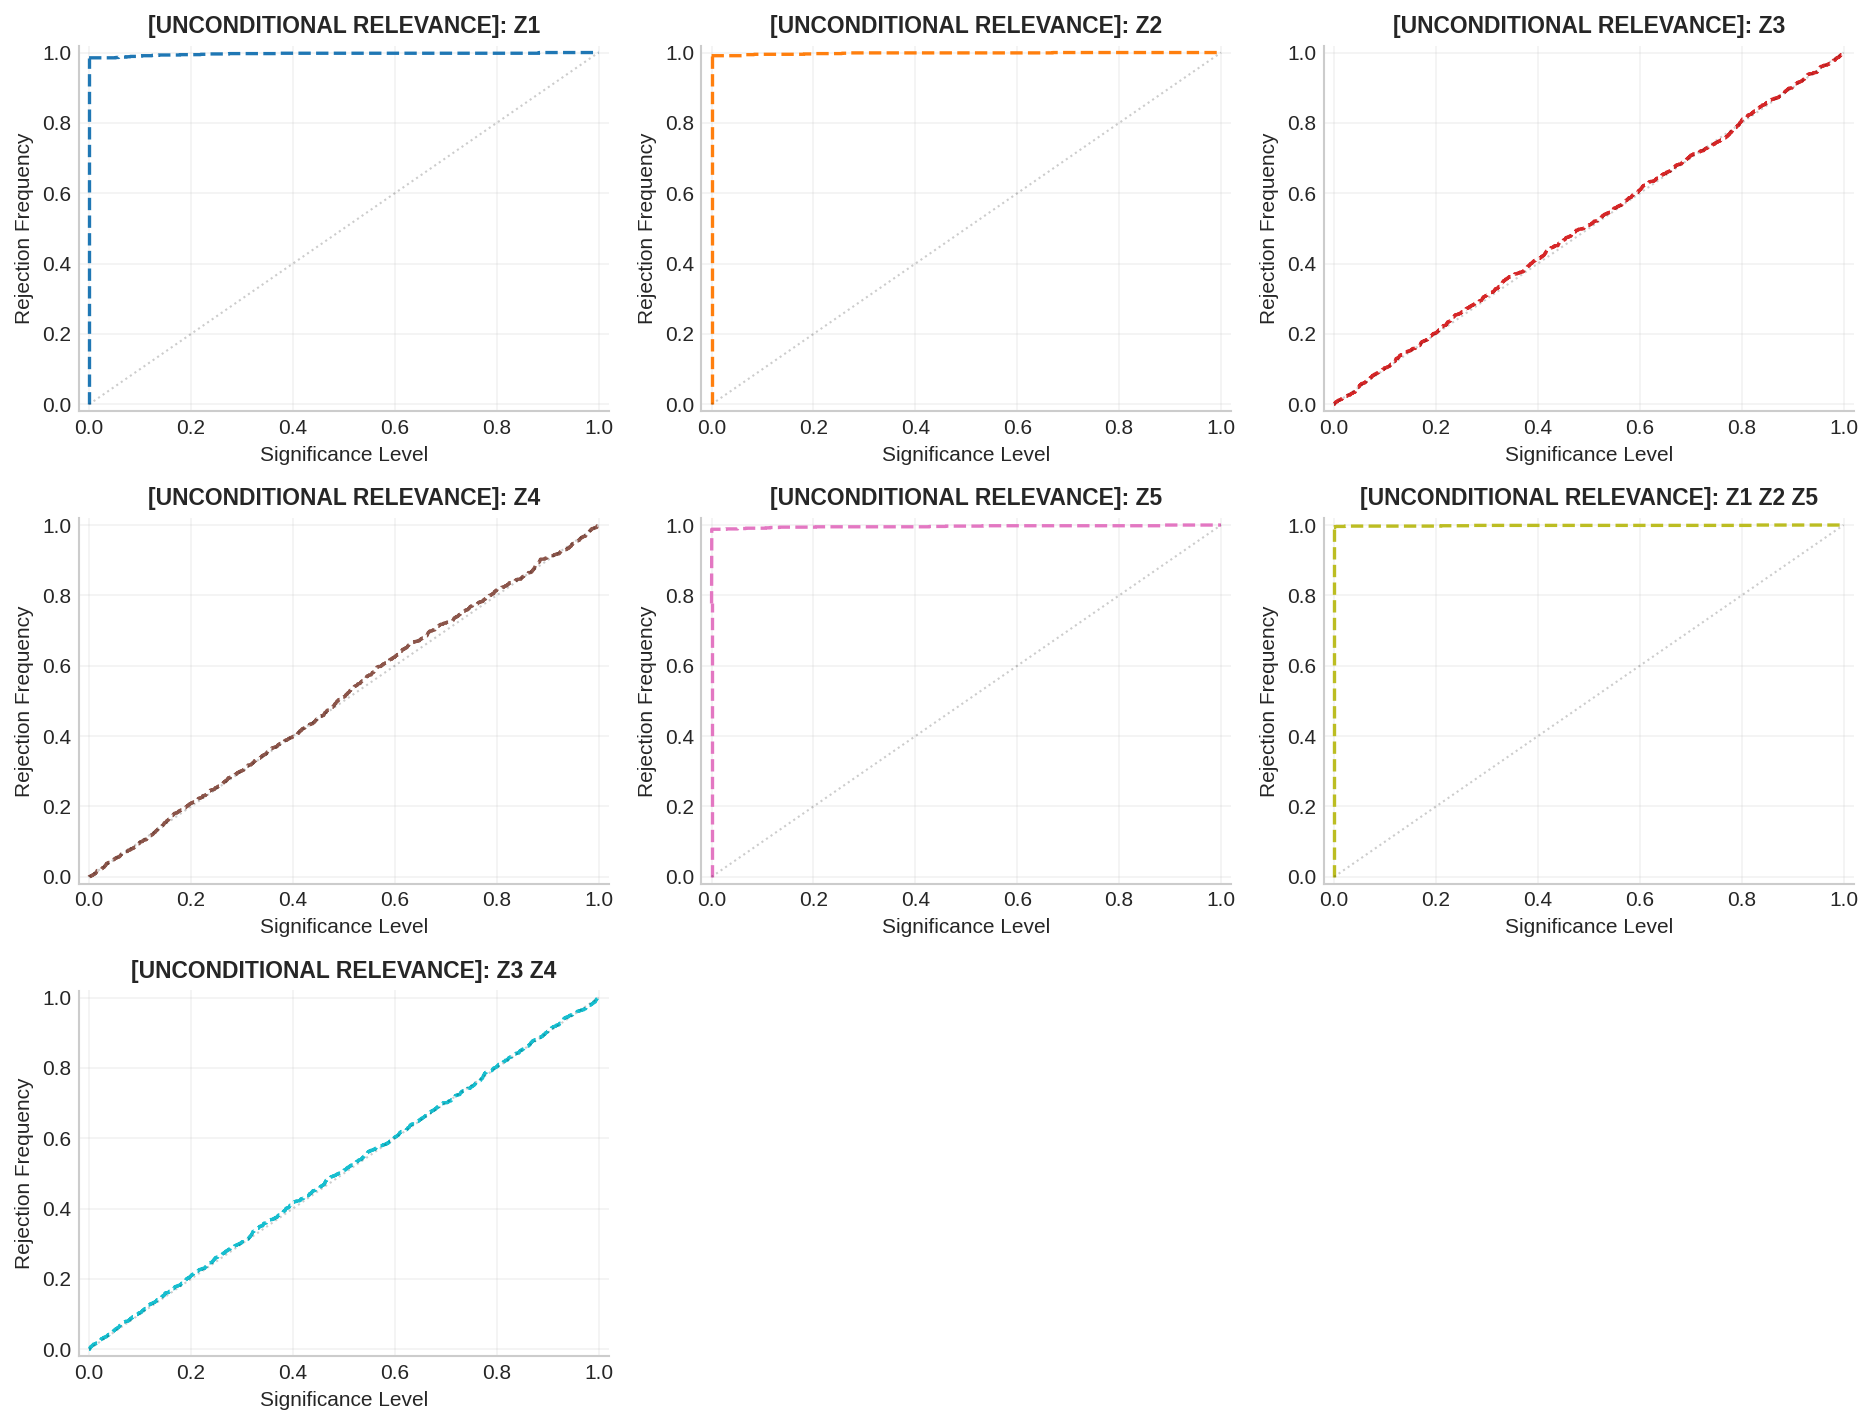

In [51]:
non_partial_monte_carlo.plot_rejection_curves(
    unconditional_results, 
    save_path="unconditional_results.png", 
    fill_vertical_zero_line=['Z1', 'Z2', 'Z5', 'Z1 Z2 Z5']
)

## <center> 2.1. Conditional Relevance [Done] <center>

In [23]:
# see test_impl: conditional_relevance

## <center> 2.2 Simulation and sanity check [Need to monte-carlo model] <center>

In [2]:
sets_of_f2_indices = [
    [0],
    [1],
    [2],
    [3],
    [4],
    [0, 1, 4],
    [2, 3],
    [5]
]

conditional_results = non_partial_monte_carlo.monte_carlo_conditional_relevance_prodecure(
    T=200,
    beta=0.98, 
    gamma=1.5,
    sets_of_f2_indices=sets_of_f2_indices,
    B=1000,
    num_alphas=5000,
    n_jobs=-1,
)

simulating many times:  32%|███▏      | 320/1000 [16:42<40:01,  3.53s/it]/home/jupyter/work/resources/VKR/tests_impl.py:319: RuntimeWarning: overflow encountered in matmul
  return float(fb.T @ fb)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/jupyter/work/resources/VKR/tests_impl.py:319: RuntimeWarning: overflow encountered in matmul
  return float(fb.T @ fb)
simulating many times: 100%|██████████| 1000/1000 [57:51<00:00,  3.47s/it]


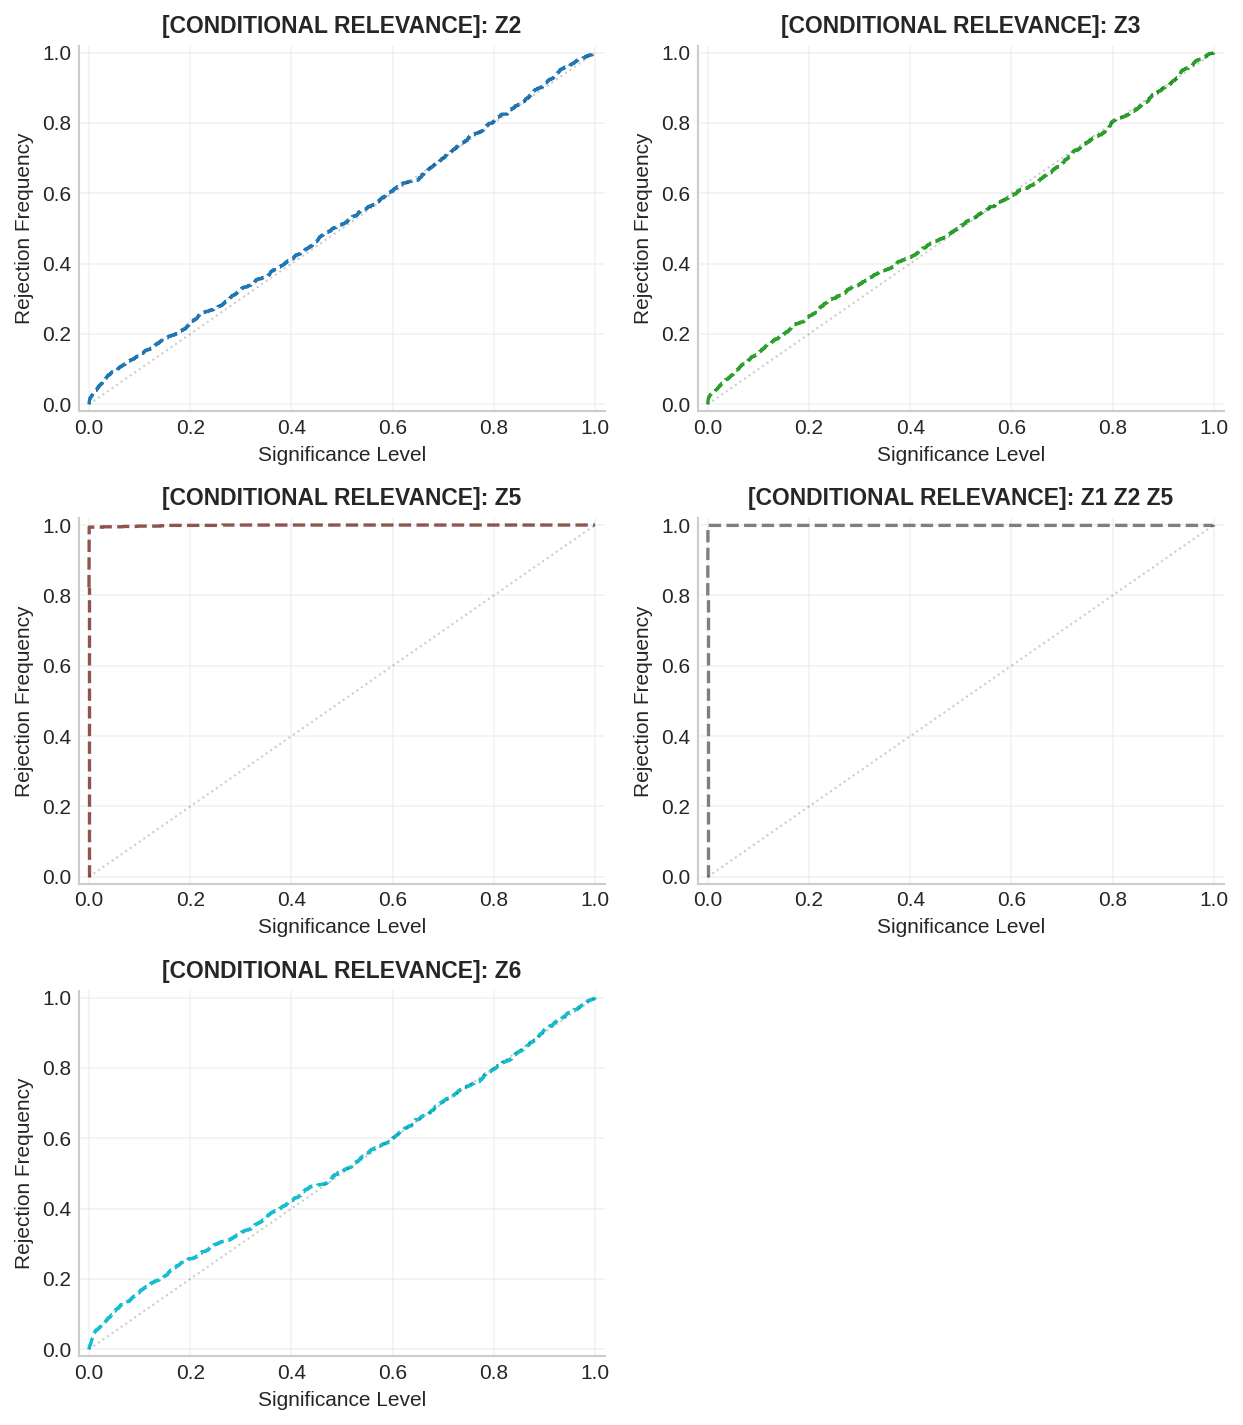

In [3]:
non_partial_monte_carlo.plot_rejection_curves(
    {k : v for k, v in conditional_results.items() if k in (
        "[CONDITIONAL RELEVANCE]: Z2",
        "[CONDITIONAL RELEVANCE]: Z3",
        "[CONDITIONAL RELEVANCE]: Z5",
        "[CONDITIONAL RELEVANCE]: Z1 Z2 Z5",
        "[CONDITIONAL RELEVANCE]: Z6"
    )},
    save_path="conditional_results.png", 
    fill_vertical_zero_line=['Z1', 'Z2', 'Z5', 'Z1 Z2 Z5']
)

## <center> <center>

## <center> 3.1. Partial Relevance Test <center>

In [4]:
# see test_impl: partial_unconditional_relevance

## <center> 3.2 Simulation and sanity check [Need to monte-carlo model] <center>

In [2]:
sets_of_f2_indices = [
    [4, 5],
    [2],
    [2],
    [3],
    [3],
    [1]
]

sets_of_a_indices = [
    [0, 1],
    [1],
    [0],
    [1],
    [0],
    [0, 1]
]

results = partial_monte_carlo.monte_carlo_partial_unconditional_relevance_prodecure(
    sets_of_f2_indices=sets_of_f2_indices,
    sets_of_a_indices=sets_of_a_indices,
    B=2000,
    num_alphas=5000
)

simulating many times: 100%|██████████| 2000/2000 [19:52<00:00,  1.68it/s]


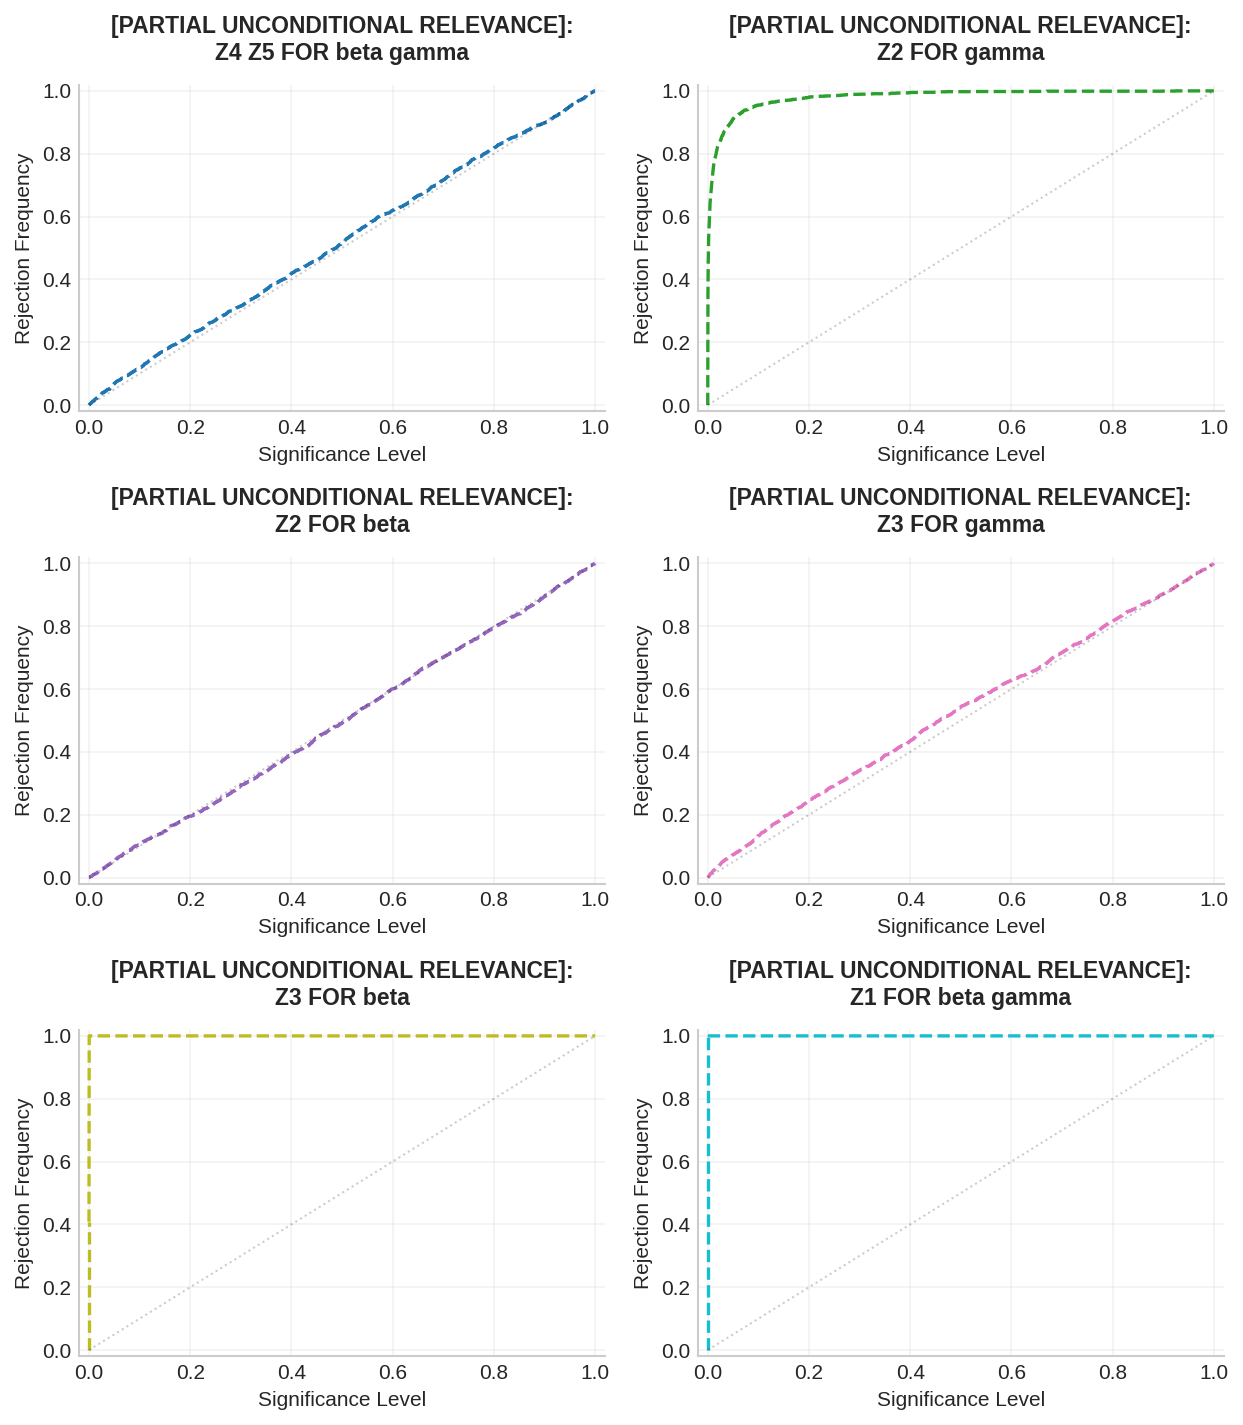

In [3]:
partial_monte_carlo.plot_rejection_curves(
    results=results, 
    fill_vertical_zero_line=[
        "Z3 FOR beta", "Z1 FOR beta gamma"
    ],
    save_path="partial_unconditional_results.png"
)

## <center> 4.1. Partial Conditional Relevance Test <center>

In [20]:
# see test_impl: partial_conditional_relevance

## <center> 4.2 Simulation and sanity check [Need to monte-carlo model] <center>

In [2]:
sets_of_f2_indices = [
    [3, 4],
    [2],
    [2],
    [1],
    [1],
    [1],
]

sets_of_a_indices = [
    [0, 1],
    [1],
    [0],
    [0, 1],
    [0],
    [1],
]

results = partial_monte_carlo.monte_carlo_partial_conditional_relevance_prodecure(
    sets_of_f2_indices=sets_of_f2_indices,
    sets_of_a_indices=sets_of_a_indices,
    B=2000,
    num_alphas=5000
)

simulating many times: 100%|██████████| 2000/2000 [46:55<00:00,  1.41s/it]


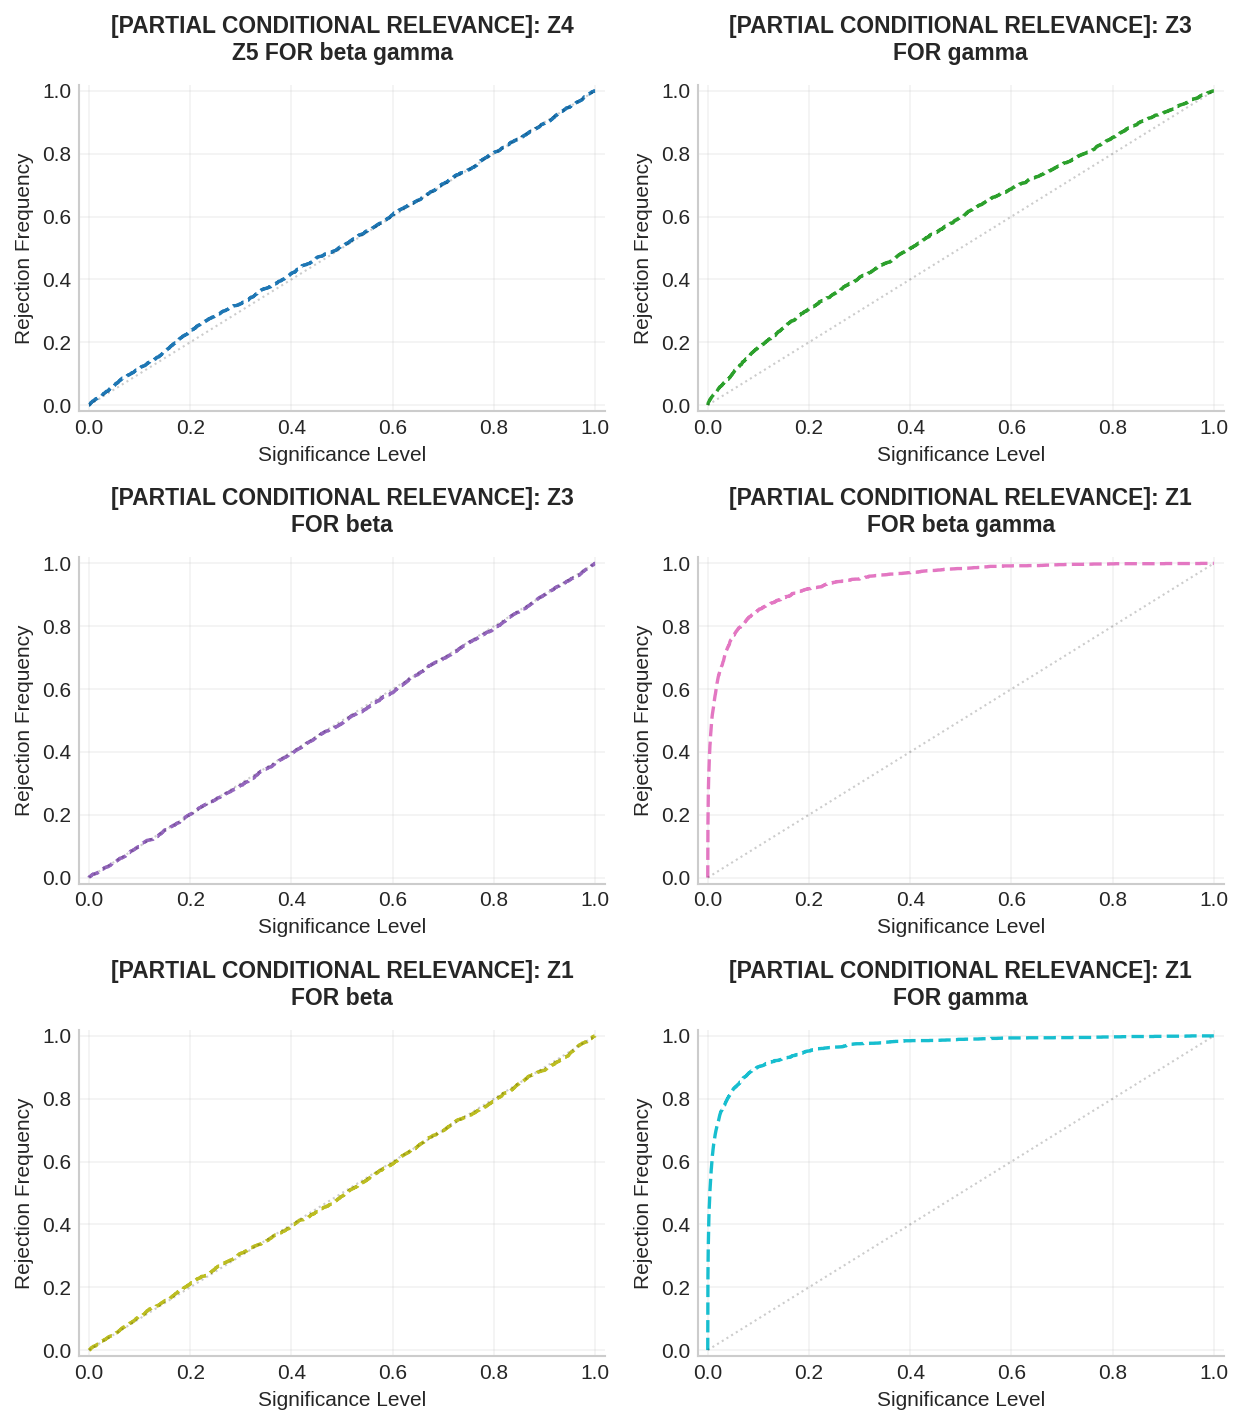

In [3]:
partial_monte_carlo.plot_rejection_curves(
    results=results, 
    fill_vertical_zero_line=[
        "Z3 FOR beta", "Z1 FOR beta gamma"
    ],
    save_path="partial_conditional_results_without_Z2.png"
)